In [138]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [158]:
#한글 폰트 사용을 위해서 세팅
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [126]:
df=pd.read_csv('roblox_games_data.csv')
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Date,Active Users,Favorites,Total Visits,Date Created,Last Updated,Server Size,Genre,Title,Creator,gameID,Category,URL,Description
0,2022-02-22 09:28:23,1557,330071,50.9M+,5/5/2021,2/19/2022,8,Building,[TIER8]FactorySimulatorByGamingGloveStudios,Gaming Glove Studios,6769764667,Most Engaging,https://www.roblox.com/games/refer?IsLargeGame...,🏭Harvest the worlds resources to build up your...
1,2022-02-22 09:28:24,3208,137809,30.9M+,4/22/2019,2/21/2022,12,All Genres,[NEWBOSS]AnimeClickersSimulatorBySimpleSimulators,Simple Simulators,3102144307,Most Engaging,https://www.roblox.com/games/refer?IsLargeGame...,Welcome to Anime Clickers! 👍New Code at 100k L...
2,2022-02-22 09:28:24,2091,2556671,725.7M+,10/16/2015,2/4/2022,20,Adventure,(Cosmiore☄️)LoomianLegacyByLlamaTrainStudio,Llama Train Studio,306964494,Most Engaging,https://www.roblox.com/games/refer?IsLargeGame...,Loomian Legacy is an in-development MMO Advent...
3,2022-02-22 09:28:25,6235,711635,461.2M+,2/25/2018,2/10/2022,12,Fighting,[CHRISTMAS+GODUSOPP+KIRITO]ABAByDogsStudios:South,Dogs Studios: South,1458767429,Most Engaging,https://www.roblox.com/games/refer?IsLargeGame...,ANIME BATTLE ARENA Controls: Shift: Sprint Q: ...
4,2022-02-22 09:28:26,7273,247852,77.2M+,10/12/2019,2/22/2022,15,RPG,DeepwokenByVowsbytheSea,Vows by the Sea,4111023553,Most Engaging,https://www.roblox.com/games/refer?IsLargeGame...,>> Deepwoken is a difficult game with permanen...


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119715 entries, 0 to 119714
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          119715 non-null  object
 1   Active Users  119715 non-null  int64 
 2   Favorites     119715 non-null  int64 
 3   Total Visits  119715 non-null  object
 4   Date Created  119715 non-null  object
 5   Last Updated  119715 non-null  object
 6   Server Size   119715 non-null  int64 
 7   Genre         119715 non-null  object
 8   Title         119715 non-null  object
 9   Creator       119715 non-null  object
 10  gameID        119715 non-null  int64 
 11  Category      119715 non-null  object
 12  URL           119715 non-null  object
 13  Description   119459 non-null  object
dtypes: int64(4), object(10)
memory usage: 12.8+ MB


### 날짜 수정

In [128]:
df['Date']=pd.to_datetime(df['Date'])
df['Date Created']=pd.to_datetime(df['Date Created'])
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [129]:
df['Date_year']=df['Date'].dt.year
df['Date_month']=df['Date'].dt.month
df['Date_day']=df['Date'].dt.day
df['Date_week']=df['Date'].dt.weekday
df['Date_hour']=df['Date'].dt.hour

In [130]:
df['created_year']=df['Date Created'].dt.year
df['created_month']=df['Date Created'].dt.month
df['created_day']=df['Date Created'].dt.day
df['created_week']=df['Date Created'].dt.weekday
df['created_hour']=df['Date Created'].dt.hour

In [131]:
#요일 바꾸기
weekday=['Date_week','created_week']

mapping={0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}

for col in weekday:
    df[col]=df[col].map(mapping)

### Total_visits 수정

In [132]:
#단위만 잘라내기
df['unit']=df['Total Visits'].str[-2:]
df['Total Visits']=df['Total Visits'].str[:-2]

In [133]:
df['unit'].value_counts()

M+    85410
B+    32766
K+     1539
Name: unit, dtype: int64

In [134]:
#Total_Visits 문자열->날짜로 숫자로 바꾸기
df['Total Visits']=pd.to_numeric(df['Total Visits'])

In [ ]:
#단위 값에 따라 값 바꾸어주기.
for i in range(len(df)):
    if df['unit'][i]=='M+':
        df['Total Visits'][i]=df['Total Visits'][i]*1000000

    elif df['unit'][i]=='B+':
        df['Total Visits'][i]=df['Total Visits'][i]*1000000000
        
    else:
        df['Total Visits'][i]=df['Total Visits'][i]*1000

In [ ]:
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119715 entries, 0 to 119714
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           119715 non-null  datetime64[ns]
 1   Active Users   119715 non-null  int64         
 2   Favorites      119715 non-null  int64         
 3   Total Visits   119715 non-null  float64       
 4   Date Created   119715 non-null  datetime64[ns]
 5   Last Updated   119715 non-null  datetime64[ns]
 6   Server Size    119715 non-null  int64         
 7   Genre          119715 non-null  object        
 8   Title          119715 non-null  object        
 9   Creator        119715 non-null  object        
 10  gameID         119715 non-null  int64         
 11  Category       119715 non-null  object        
 12  URL            119715 non-null  object        
 13  Description    119459 non-null  object        
 14  Date_year      119715 non-null  int64         
 15  

In [ ]:
df.to_csv('roblox_preprocessed_data.csv',index=False)

In [ ]:
df['Date']=df['Date'].astype(str)

In [ ]:
df['Date_ymd']=df['Date'].str[:10]
df['Date_time']=df['Date'].str[-8:]

In [ ]:
df['Date_ymd']=pd.to_datetime(df['Date_ymd'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119715 entries, 0 to 119714
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           119715 non-null  object        
 1   Active Users   119715 non-null  int64         
 2   Favorites      119715 non-null  int64         
 3   Total Visits   119715 non-null  float64       
 4   Date Created   119715 non-null  datetime64[ns]
 5   Last Updated   119715 non-null  datetime64[ns]
 6   Server Size    119715 non-null  int64         
 7   Genre          119715 non-null  object        
 8   Title          119715 non-null  object        
 9   Creator        119715 non-null  object        
 10  gameID         119715 non-null  int64         
 11  Category       119715 non-null  object        
 12  URL            119715 non-null  object        
 13  Description    119459 non-null  object        
 14  Date_year      119715 non-null  int64         
 15  

In [ ]:
df.to_csv('roblox_preprocessed_data.csv',index=False)

## EDA

### 데이터 불러오기

In [141]:
df=pd.read_csv('roblox_preprocessed_data.csv')
df.head()

,Date,Active Users,Favorites,Total Visits,Date Created,Last Updated,Server Size,Genre,Title,Creator,...,Date_week,Date_hour,created_year,created_month,created_day,created_week,created_hour,unit,Date_ymd,Date_time
0,2022-02-22 09:28:23,1557,330071,50900000.0,2021-05-05,2022-02-19,8,Building,[TIER8]FactorySimulatorByGamingGloveStudios,Gaming Glove Studios,...,화,9,2021,5,5,수,0,M+,2022-02-22,09:28:23
1,2022-02-22 09:28:24,3208,137809,30900000.0,2019-04-22,2022-02-21,12,All Genres,[NEWBOSS]AnimeClickersSimulatorBySimpleSimulators,Simple Simulators,...,화,9,2019,4,22,월,0,M+,2022-02-22,09:28:24
2,2022-02-22 09:28:24,2091,2556671,725700000.0,2015-10-16,2022-02-04,20,Adventure,(Cosmiore☄️)LoomianLegacyByLlamaTrainStudio,Llama Train Studio,...,화,9,2015,10,16,금,0,M+,2022-02-22,09:28:24
3,2022-02-22 09:28:25,6235,711635,461200000.0,2018-02-25,2022-02-10,12,Fighting,[CHRISTMAS+GODUSOPP+KIRITO]ABAByDogsStudios:South,Dogs Studios: South,...,화,9,2018,2,25,일,0,M+,2022-02-22,09:28:25
4,2022-02-22 09:28:26,7273,247852,77200000.0,2019-10-12,2022-02-22,15,RPG,DeepwokenByVowsbytheSea,Vows by the Sea,...,화,9,2019,10,12,토,0,M+,2022-02-22,09:28:26


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119715 entries, 0 to 119714
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           119715 non-null  object 
 1   Active Users   119715 non-null  int64  
 2   Favorites      119715 non-null  int64  
 3   Total Visits   119715 non-null  float64
 4   Date Created   119715 non-null  object 
 5   Last Updated   119715 non-null  object 
 6   Server Size    119715 non-null  int64  
 7   Genre          119715 non-null  object 
 8   Title          119715 non-null  object 
 9   Creator        119715 non-null  object 
 10  gameID         119715 non-null  int64  
 11  Category       119715 non-null  object 
 12  URL            119715 non-null  object 
 13  Description    119459 non-null  object 
 14  Date_year      119715 non-null  int64  
 15  Date_month     119715 non-null  int64  
 16  Date_day       119715 non-null  int64  
 17  Date_week      119715 non-nul

In [204]:
#날짜들은 모두 datetime으로 바꾸어주기

df['Date_ymd']=pd.to_datetime(df['Date_ymd'])

In [ ]:
#게임 별로 그룹바이
df.groupby('Title').count().sort_values('Date',ascending=False)

,Date,Active Users,Favorites,Total Visits,Date Created,Last Updated,Server Size,Genre,Creator,gameID,...,Date_month,Date_day,Date_week,Date_hour,created_year,created_month,created_day,created_week,created_hour,unit
Title,,,,,,,,,,,,,,,,,,,,,
BeeSwarmSimulatorBy@Onett,2549,2549,2549,2549,2549,2549,2549,2549,2549,2549,...,2549,2549,2549,2549,2549,2549,2549,2549,2549,2549
DeepwokenByVowsbytheSea,1773,1773,1773,1773,1773,1773,1773,1773,1773,1773,...,1773,1773,1773,1773,1773,1773,1773,1773,1773,1773
WelcometoBloxburgBy@Coeptus,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,...,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619
[Trialsof200]MightyOmegaByKengunOmega,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,...,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395
[UPDATE]ShindoLifeByRELLWorld,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369,...,1369,1369,1369,1369,1369,1369,1369,1369,1369,1369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[Beta]JennasStory**SECRETENDING*ByBunnyPhyx,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
[2x💧🔨]WeaponFightingSimulatorByLightningDragonStudio,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
[3HOURS!]AnimeWreckingSimulator!ByWreckingGames,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


데이터에 수집된 게임들은 총 1378개. 

## 맵 하나만 분석 - BeeSwarmSimulatorBy@Onett

In [205]:
#BeeSwarmSimulatorBy@Onett 분석

bs=df[df['Title']=='BeeSwarmSimulatorBy@Onett']
bs=bs.reset_index(drop=True)
bs.sample(5)

,Date,Active Users,Favorites,Total Visits,Date Created,Last Updated,Server Size,Genre,Title,Creator,...,Date_week,Date_hour,created_year,created_month,created_day,created_week,created_hour,unit,Date_ymd,Date_time
243,2022-03-05 15:00:41,37618,4942443,1.800000e+09,2018-03-21,2022-03-04,6,Adventure,BeeSwarmSimulatorBy@Onett,@Onett,...,토,15,2018,3,21,수,0,B+,2022-03-05,15:00:41
450,2022-03-10 17:00:45,27540,4949620,1.800000e+09,2018-03-21,2022-03-09,6,Adventure,BeeSwarmSimulatorBy@Onett,@Onett,...,목,17,2018,3,21,수,0,B+,2022-03-10,17:00:45
2204,2022-02-03 19:01:00,49378,4880481,1.800000e+09,2018-03-21,2022-01-23,6,Adventure,BeeSwarmSimulatorBy@Onett,@Onett,...,목,19,2018,3,21,수,0,B+,2022-02-03,19:01:00
1601,2022-04-21 22:00:29,14229,5014675,1.900000e+09,2018-03-21,2022-04-21,6,Adventure,BeeSwarmSimulatorBy@Onett,@Onett,...,목,22,2018,3,21,수,0,B+,2022-04-21,22:00:29
2133,2022-01-31 13:00:00,53344,4872666,1.700000e+09,2018-03-21,2022-01-23,6,Adventure,BeeSwarmSimulatorBy@Onett,@Onett,...,월,13,2018,3,21,수,0,B+,2022-01-31,13:00:00


#### 날짜별 Active Users 수

Text(0.5, 1.0, 'BeeSwarmSimulatorBy@Onett 날짜별 Active Users 수')

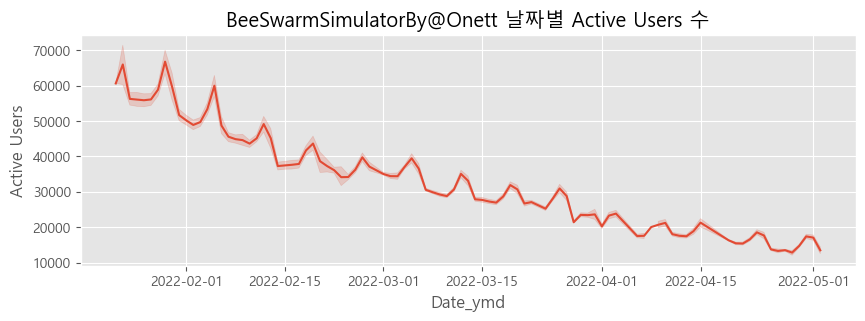

In [160]:
plt.figure(figsize=(10,3))
sns.lineplot(bs,x='Date_ymd',y='Active Users')
plt.title('BeeSwarmSimulatorBy@Onett 날짜별 Active Users 수')


### 시간별 active Users 수

Text(0.5, 1.0, 'BeeSwarmSimulatorBy@Onett 시간별 Active Users 수')

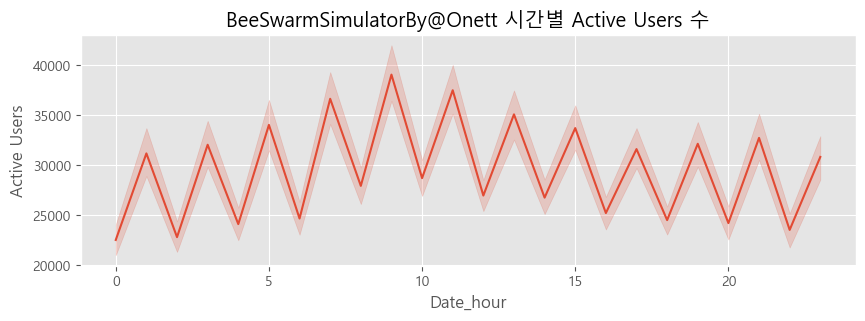

In [164]:
plt.figure(figsize=(10,3))
sns.lineplot(bs,x='Date_hour',y='Active Users')
plt.title('BeeSwarmSimulatorBy@Onett 시간별 Active Users 수')

### 요일별 active users수

In [179]:
weekday_order=['월','화','수','목','금','토','일']
weekday_bs=bs.groupby('Date_week').mean()


# 요일 데이터를 월화수목금토일 순으로 정렬
weekday_bs=weekday_bs.loc[weekday_order]


Text(0.5, 1.0, 'BeeSwarmSimulatorBy@Onett 요일별 Active Users')

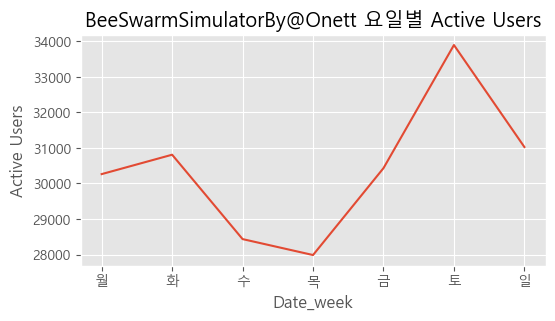

In [190]:

plt.figure(figsize=(6,3))
sns.lineplot(weekday_bs,x=weekday_bs.index,y='Active Users')
plt.title('BeeSwarmSimulatorBy@Onett 요일별 Active Users')


### 월별 active users

Text(0.5, 1.0, 'BeeSwarmSimulatorBy@Onett 월별 Active Users')

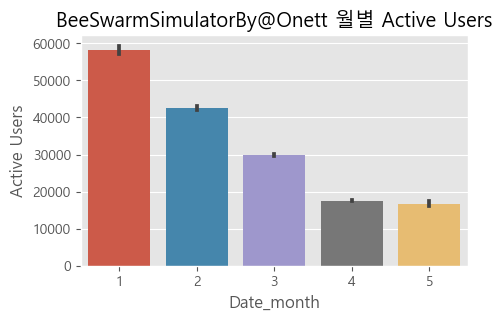

In [198]:
plt.figure(figsize=(5,3))
sns.barplot(bs,x='Date_month',y='Active Users')
plt.title('BeeSwarmSimulatorBy@Onett 월별 Active Users')

### 날짜별 서버사이즈 비교. 

서버사이즈는 변화하지 않는 것 같다. 만든 이후로

Text(0.5, 1.0, 'BeeSwarmSimulatorBy@Onett 월별 Active Users')

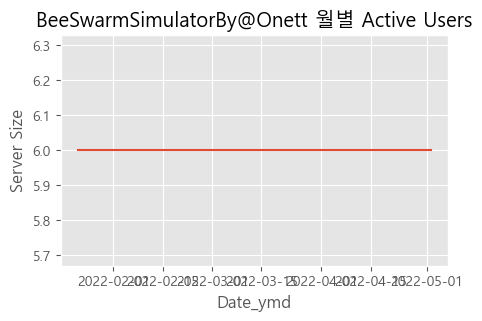

In [207]:
plt.figure(figsize=(5,3))
sns.lineplot(bs,x='Date_ymd',y='Server Size')
plt.title('BeeSwarmSimulatorBy@Onett 월별 Active Users')

## 전체 데이터 분석

### 월별 인기있는 장르 분석

In [229]:
month_genre=df.groupby(['Date_month','Genre']).mean().sort_values(['Date_month','Active Users'],ascending=False)
month_genre

Active Users     Favorites  Total Visits  \
Date_month Genre                                                     
5          Town and City  82196.091549  7.463105e+06  5.788839e+09   
           Horror         53562.478261  8.570340e+06  4.302139e+09   
           Adventure      41330.810959  2.558187e+06  1.405716e+09   
           RPG            22382.657895  4.289796e+06  4.495348e+09   
           All Genres     21298.030769  9.342124e+05  6.777636e+08   
           Fighting        7898.230570  6.322515e+05  2.403865e+08   
           FPS             6835.950980  3.382958e+06  1.157324e+09   
           Military        3430.431818  6.269569e+05  1.503864e+08   
           Sports          3374.272727  4.548137e+05  1.514273e+08   
           Building        2770.948980  5.148535e+05  8.698776e+07   
4          Town and City  63268.381469  7.245238e+06  5.251767e+09   
           Adventure      32174.910013  2.327441e+06  1.428806e+09   
           Horror         31883.793218  5.950028e+06  2.952129e+09   
           RPG            21640.984920  3.806722e+06  3.892398e+09   
           All Genres     19524.181713  9.784125e+05  6.966688e+08   
           FPS             8436.032468  4.679140e+06  1.686056e+09   
           Fighting        7439.072923  6.862982e+05  2.675001e+08   
           Sports          4334.728395  1.976881e+05  5.942253e+07   
           Building        3302.763049  5.639720e+05  9.782949e+07   
           Military        3173.016484  4.803060e+05  1.096156e+08   
           Naval           3057.850000  1.148560e+05  2.757625e+07   
           Comedy          2147.852941  1.053409e+06  3.862235e+08   
3          Town and City  70471.544050  8.045784e+06  5.611137e+09   
           Adventure      32143.540908  2.801072e+06  1.940256e+09   
           Horror         20316.182403  3.569474e+06  1.684305e+09   
           RPG            19570.727915  3.002787e+06  3.056197e+09   
           All Genres     19318.505420  8.987913e+05  5.931848e+08   
           FPS            11060.940777  6.101595e+06  2.201247e+09   
           Sci-Fi          6547.636364  3.300965e+06  5.906727e+08   
           Fighting        6047.584073  7.151736e+05  2.679251e+08   
           Naval           4093.797403  5.820856e+05  1.679525e+08   
           Building        3238.340754  5.044316e+05  8.940897e+07   
           Military        2578.948798  2.913456e+05  6.224817e+07   
           Comedy          2170.573171  6.925106e+05  1.189732e+08   
           Sports          1862.868778  4.574110e+05  8.546109e+07   
2          Town and City  77710.798415  7.825616e+06  5.258589e+09   
           RPG            32106.381185  4.111828e+06  4.238547e+09   
           Adventure      27803.744437  2.257720e+06  1.612495e+09   
           Horror         23681.481117  4.106379e+06  2.101788e+09   
           All Genres     21896.013958  8.962311e+05  6.214317e+08   
           FPS             8774.272608  4.479277e+06  1.589856e+09   
           Fighting        6958.331914  7.969125e+05  3.023484e+08   
           Building        3597.509259  8.873168e+05  1.540079e+08   
           Comedy          3194.070000  4.021866e+05  1.394175e+08   
           Military        2189.193966  2.162926e+05  4.812263e+07   
           Naval           1140.434211  9.555875e+04  5.161184e+06   
1          Town and City  79143.456647  7.822409e+06  5.201691e+09   
           Adventure      36230.893013  3.191692e+06  2.312362e+09   
           Horror         28125.022876  6.060587e+06  3.388325e+09   
           RPG            25467.382353  3.453685e+06  3.485807e+09   
           All Genres     24878.136510  1.174581e+06  7.516352e+08   
           FPS             8352.400735  4.447796e+06  1.479543e+09   
           Fighting        6576.711111  9.011047e+05  3.382090e+08   
           Sci-Fi          4923.290323  3.215868e+06  5.579645e+08   
           Comedy          3818.758242  7.717791e+05  2.419901e+08   
           Building        3777.2089

<Axes: xlabel='Genre', ylabel='Active Users'>

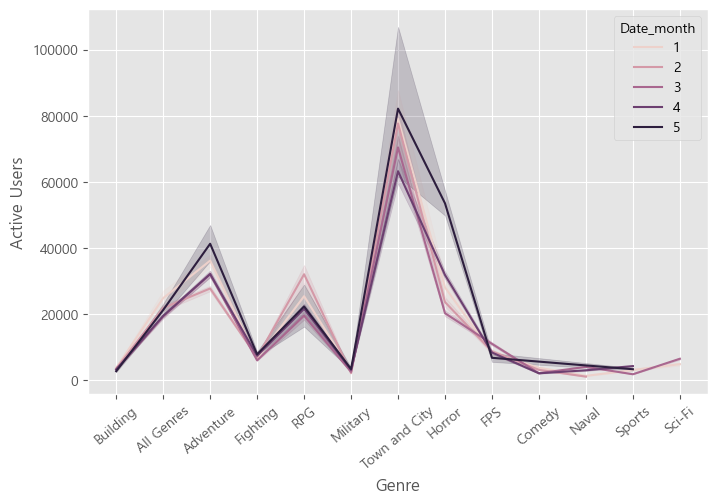

In [241]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=40)
sns.lineplot(data=df,x='Genre',y='Active Users',hue='Date_month')

Town and City는 꾸준히 인기가 많았고, 5월에 특히 Active Users 수가 늘었다. 
Horror가 그다음으로 인기가 많았는데 1월부터 5월까지 꾸준히 Active Users수가 늘어나고 있는 것을 알 수 있다. 
그다음으로는 Adventure, RPG 순으로 인기가 많다. 

### 요일별 인기있는 장르

<Axes: xlabel='Genre', ylabel='Active Users'>

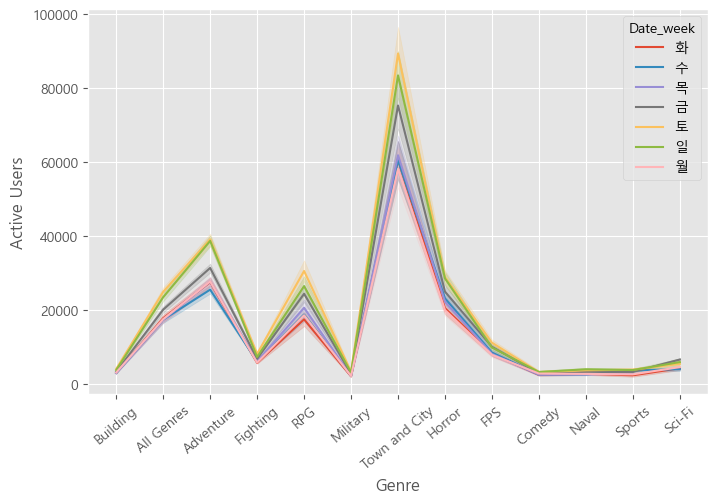

In [242]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=40)
sns.lineplot(data=df,x='Genre',y='Active Users',hue='Date_week')

<Axes: xlabel='Date_week', ylabel='Active Users'>

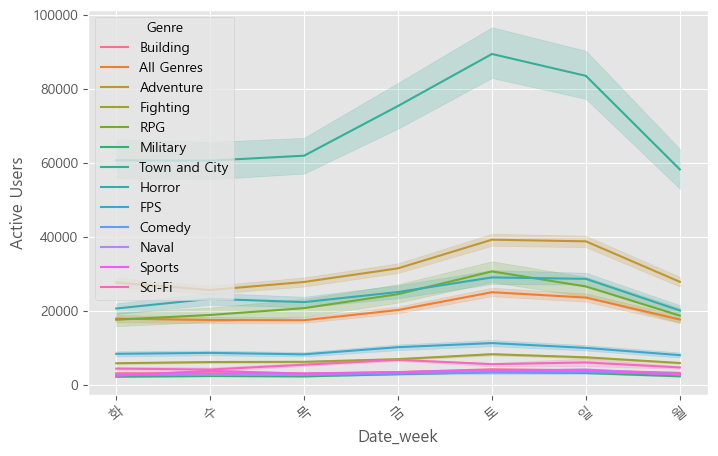

In [245]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x='Date_week',y='Active Users',hue='Genre')

In [249]:
month_genre=df.groupby(['Date_week','Genre']).mean().sort_values(['Date_week','Active Users'],ascending=False)
month_genre=month_genre.loc[weekday_order]
month_genre

Active Users     Favorites  Total Visits  \
Date_week Genre                                                     
월         Town and City  58198.189815  7.399872e+06  5.063693e+09   
          Adventure      27808.844288  2.443603e+06  1.634172e+09   
          Horror         20061.589205  4.153154e+06  2.060883e+09   
          RPG            18674.337330  3.338271e+06  3.403959e+09   
          All Genres     17617.385124  9.476192e+05  6.257455e+08   
...                               ...           ...           ...   
일         Naval           4068.195652  4.385914e+05  1.214793e+08   
          Building        3864.520052  6.004168e+05  1.056916e+08   
          Sports          3858.805310  3.106649e+05  8.025841e+07   
          Comedy          3324.517241  4.999480e+05  1.279414e+08   
          Military        3160.343023  3.548384e+05  7.977674e+07   

                         Server Size        gameID  Date_year  Date_month  \
Date_week Genre                                                             
월         Town and City    60.591821  2.908645e+09     2022.0    2.819444   
          Adventure        16.170123  4.330669e+09     2022.0    2.875571   
          Horror           22.310345  3.704029e+09     2022.0    2.752624   
          RPG              28.677058  3.709775e+09     2022.0    2.836131   
          All Genres       18.817562  6.297058e+09     2022.0    2.962702   
...                              ...           ...        ...         ...   
일         Naval            45.652174  2.374024e+09     2022.0    2.923913   
          Building          7.199224  4.625577e+09     2022.0    2.956016   
          Sports           26.955752  5.161889e+09     2022.0    4.017699   
          Comedy            8.965517  6.752412e+09     2022.0    1.844828   
          Military         39.912791  3.862694e+09     2022.0    3.127907   

                          Date_day  Date_hour  created_year  created_month  \
Date_week Genre                                                              
월         Town and City  16.570988  11.763889   2017.816358       5.242284   
          Adventure      16.167311  11.454482   2019.209842       4.973638   
          Horror         16.806597  11.199400   2018.367316       4.235382   
          RPG            16.501998  11.627498   2019.063949       5.981615   
          All Genres     16.551577  11.271526   2020.442242       5.893862   
...                            ...        ...           ...            ...   
일         Naval          12.489130  11.815217   2017.739130       7.739130   
          Building       15.530401  11.913325   2018.893920       7.659767   
          Sports         13.504425  11.212389   2019.362832       7.566372   
          Comedy         16.810345  12.017241   2020.379310      10.620690   
          Military       15.363372  11.191860   2018.941860       8.930233   

                         created_day  created_hour  
Date_week Genre                                     
월         Town and City    14.697531           0.0  
          Adventure        15.666432           0.0  
          Horror           18.667166           0.0  
          RPG              13.019984           0.0  
          All Genres       17.996377           0.0  
...                              ...           ...  
일         Naval            11.760870           0.0  
          Building         13.609314           0.0  
          Sports           19.212389           0.0  
          Comedy           18.103448           0.0  
          Military         15.351744           0.0  

[90 rows x 13 columns]

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df,x='Date_week',y='Active Users',hue='Genre')

In [250]:
month_genre.index()

TypeError: 'MultiIndex' object is not callable